# Biological Oceanography (BO)

<img src="https://github.com/gmanuch/DataScienceOceanography/blob/main/Tutorials2025/BO/Prochlorococcus_marinus.jpeg?raw=1"/>


This tutorial is part of our Biological Oceanography day. It demonstrates how to do basic analysis and visualization of gridded biological data. We will use A,B,and C data which can be downloaded using CMAP API, a giant data database for Earth system observations and modeling. To download the data using API, please register at CMAP and generate your API key.

### Estimated tutorial time: 2 hours

## Tutorial goals

- Python Skills
    - Work with dataframes
    - Make different statistical plots
    - Data co-location
- BO knowledge
    - Learn about global ocean photosynthesis and primary productivity signatures from satellite observations
    - Understand the vertical distributions of chlorophyll, nutrients, and light availability in the ocean
    - Explore biodiversity and how populations change in different regions of the ocean
    

## Data

<img src="https://github.com/gmanuch/DataScienceOceanography/blob/main/Tutorials2025/BO/CMAP.png?raw=1" width="500"/>
We will be downloading the data from the Simons Collaborative Marine Atlas Project __(CMAP)__.

Get your unique __API key__ by registering at simonscmap.com and then going to https://simonscmap.com/apikeymanagement

- HOT: Hawaii Ocean Time series. Since 1988, the Station ALOHA near Hawaii has been sampled approximately every month as part of the HOT cruises. https://hahana.soest.hawaii.edu/hot/. This data can also be downloaded using CMAP API: https://simonscmap.com/catalog/datasets/HOT_Bottle_ALOHA.

- The near-surface concentration of chlorophyll-a: a satellite-derived 8-day averaged product with a spatial resolution of 9km made by NASA https://earthobservatory.nasa.gov/global-maps/MY1DMM_CHLORA, which is also available from CMAP at https://simonscmap.com/catalog/datasets/MODIS%20CHL.

- The Imaging FlowCytoBot (IFCB) is an in situ automated imaging flow cytometer that generates images of particles suspended in seawater. The instrument continuously samples (few seconds) from ~5 ml aliquots from the intake, and processes all particles contained in that volume for the next 20 mins. This dataset is for the abundance of imaged cells by genus: https://simonscmap.com/catalog/datasets/Gradients2_MGL1704_IFCB_Abundance

- Atlantic Meridional Transect cruise 13 (ATM 13): Prochlorococcus abundance, Synechococcus abundance, and associated metadata. https://simonscmap.com/catalog/datasets/AMT13_Prochlorococcus_Abundance

  

## Reading

Brierley, A. S. (2017). Plankton. Current Biology, 27(11), R478-R483. https://www.sciencedirect.com/science/article/pii/S0960982217302154

Armbrust, E. V., & Palumbi, S. R. (2015). Uncovering hidden worlds of ocean biodiversity. Science, 348(6237), 865-867. https://doi.org/10.1126/science.aaa7378

Bristow, L. A., Mohr, W., Ahmerkamp, S., & Kuypers, M. M. (2017). Nutrients that limit growth in the ocean. Current Biology, 27(11), R474-R478. https://www.sciencedirect.com/science/article/pii/S0960982217303287

Tang, W., Llort, J., Weis, J., Perron, M. M., Basart, S., Li, Z., ... & Cassar, N. (2021). Widespread phytoplankton blooms triggered by 2019–2020 Australian wildfires. Nature, 597(7876), 370-375. https://www.nature.com/articles/s41586-021-03805-8

Sala, E., Mayorga, J., Bradley, D. et al. Protecting the global ocean for biodiversity, food and climate. Nature 592, 397–402 (2021). https://doi.org/10.1038/s41586-021-03371-z

# Let's start!

In [20]:
!pip install pycmap

In [21]:
import pandas as pd    #dataframe to work with tables
import numpy as np     #for general calculations with arrays
import pycmap          #API for querrying the data from CMAP

import plotly.express as px   #makes nice interactive plots


import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.
import matplotlib.pyplot as plt  #makes regular plots

from matplotlib.colors import LogNorm  #to make logarithmic colormap axis

import xarray as xr  #to work with data

from scipy.interpolate import griddata   #interpolate irregularly spaced data onto a grid

## Chlorophyll A estimates from satellite observations of ocean color

#### Get the API key by registering at simonscmap.com and then going to https://simonscmap.com/apikeymanagement

In [22]:
#enter your personal API key from CMAP here
key = "f6abca44-f40b-4e9d-942f-983b911b9293"
#call the CMAP API using your unique key
api = pycmap.API(token=key)

#key =!tail "$HOME/$usr/.cmap_key"    # reading the last line from a file using a system command
#api = pycmap.API(token=key[0])       # call api using your unique API key

In [23]:
#An example of how to querry data from CMAP

modis=api.query(
         '''
         SELECT [time], lat, lon, chl FROM tblCHL_REP
         WHERE
         [time] BETWEEN '2016-06-01' AND '2016-06-16' AND
         lat BETWEEN -90 AND 90 AND
         lon BETWEEN -180 AND 180
         '''
         )
df_rows = pd.DataFrame(modis).set_index(["time",  "lat", "lon"])  # since this is a gridded data, it is useful to transorm from a table into an array
ds = xr.Dataset.from_dataframe(df_rows)
chl=ds['chl'].mean('time');  # taking an average in time, once we have the data in xarray format

del modis, ds # free some memory by deleting the no longer needed variables.

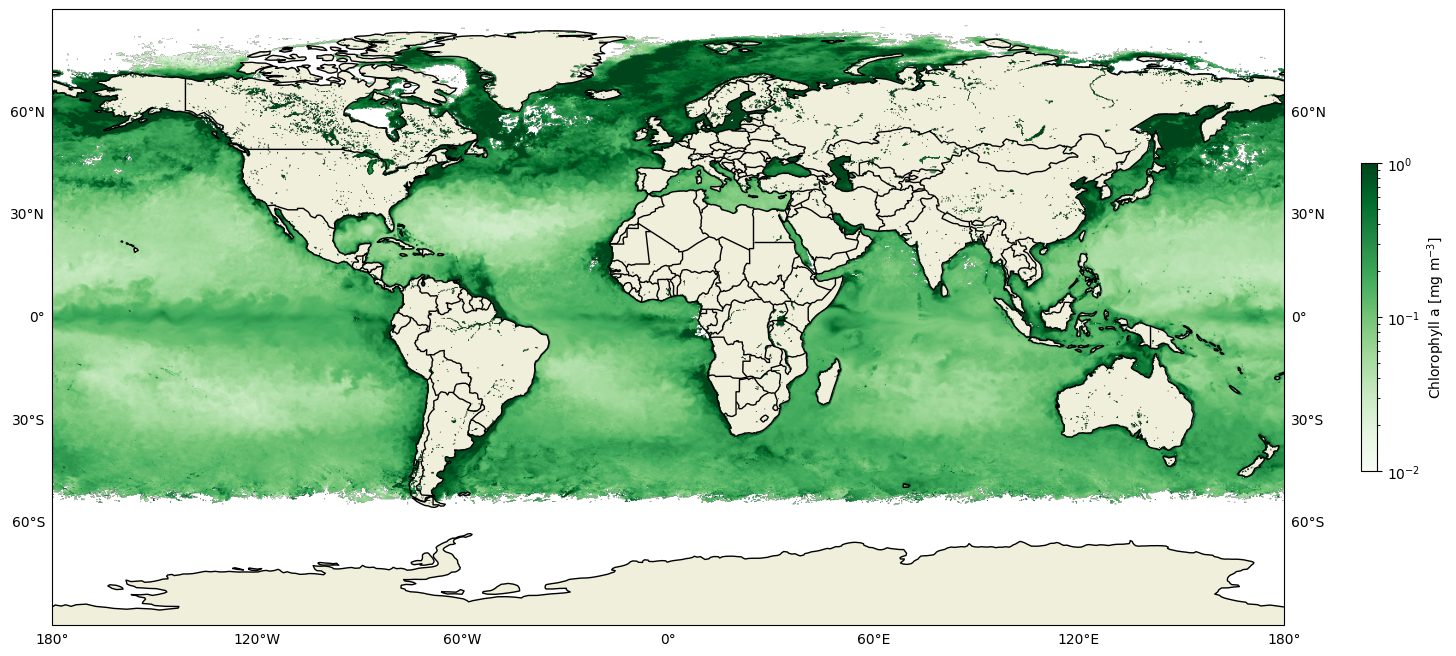

In [24]:
plt.figure(figsize=(20,8))
ax = plt.axes(projection=ccrs.PlateCarree())

gl=ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.xlines=None
gl.ylines=None

im=plt.imshow(chl,
           cmap='Greens',                      #specify the colormap
           norm=LogNorm(vmin=0.01, vmax=1),    #specify the logarithmic colormap with upper and lower limits
           extent=[-180,180,90,-90])           #imshow displays an rectangular image only, so we need to specify its extent in our coordinate system

plt.colorbar(im,shrink=0.5, label='Chlorophyll a [mg m$^{-3}$]')
ax.invert_yaxis()   #flip the y axis

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS);

## In-class exercise \#1: querry the chlorophyll time series averaged over a region in North Atlantic

To get the more recent data, use a different chlorophyll dataset https://simonscmap.com/catalog/datasets/MODIS%20CHL


Instructions:
 - Follow the "Query" Example \#2 provided by CMAP under Data Retrieval (API) section of the documentation: https://github.com/simonscmap/pycmap#1-data-retrieval-api
 - Name the new variable __modis_NA__
 - Use SQL language for denoting averaged quantities, like AVG(lat) and AVG(chl)
 - Specify the boundaries of the box: lat BETWEEN 40 AND 50 AND lon BETWEEN -40 AND -20
 - Use SQL language to group and order by time as: GROUP BY [time] and ORDER BY [time]
 - change the time column to be a proper datetime variable for easy manipulation and cleaner plots: pd.to_datetime(time_variable)
 - make a final plot of chlorophyl concentration averaged within the North Atlantic box.
 - does the chlorophyl concentration vary smoothly or spiky?


In [43]:
#Enter your solution here

#Solution
#modis_NA=

#An example of how to querry data from CMAP

modis_NA=api.query(
        '''
        SELECT [time], AVG(lat) AS lat, AVG(lon) AS lon, AVG(chlor_a) AS chl
        FROM tblModis_CHL
         WHERE
         [time] BETWEEN '2002-07-04' AND '2022-06-10' AND
         lat BETWEEN 40 AND 50 AND
         lon BETWEEN -40 AND -20
         GROUP BY [time]
         ORDER BY [time]
         '''
         )


df_rows = pd.DataFrame(modis_NA).set_index(["time",  "lat", "lon"])  # since this is a gridded data, it is useful to transorm from a table into an array
ds = xr.Dataset.from_dataframe(df_rows)
chl=ds['chl'].mean('time');  # taking an average in time, once we have the data in xarray format

#del modis_NA, ds # free some memory by deleting the no longer needed variables.

In [44]:
modis_NA

,time,lat,lon,chl
0,2002-07-04T00:00:00,44.999997,-29.999995,0.373546
1,2002-07-12T00:00:00,44.999997,-29.999995,0.343967
2,2002-07-20T00:00:00,44.999997,-29.999995,0.298610
3,2002-07-28T00:00:00,44.999997,-29.999995,0.405762
4,2002-08-05T00:00:00,44.999997,-29.999995,0.306033
...,...,...,...,...
912,2022-05-09T00:00:00,44.999999,-29.999996,0.598457
913,2022-05-17T00:00:00,44.999999,-29.999996,0.479533
914,2022-05-25T00:00:00,44.999999,-29.999996,0.463285
915,2022-06-02T00:00:00,44.999999,-29.999996,0.452822


### Here is how to pivot the table to plot each year as a separate curve

In [45]:
pv = pd.pivot_table(modis_NA,
                    index=pd.DatetimeIndex(modis_NA['time']).month,
                    columns=pd.DatetimeIndex(modis_NA['time']).year,
                    values='chl')
pv

time,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
time,,,,,,,,,,,,,,,,,,,,,
1,NaN,0.209718,0.245717,0.234945,0.188770,0.188650,0.219959,0.218301,0.205172,0.262402,...,0.210498,0.220652,0.294805,0.224206,0.292962,0.269252,0.259745,0.249105,0.261284,0.289735
2,NaN,0.203374,0.229266,0.255725,0.196312,0.183812,0.218750,0.230813,0.201196,0.249279,...,0.229157,0.188006,0.274067,0.271735,0.264138,0.257660,0.224373,0.258286,0.205275,0.231639
3,NaN,0.277818,0.245084,0.275763,0.230424,0.295077,0.290592,0.327482,0.334322,0.317226,...,0.262766,0.290438,0.414967,0.436379,0.360104,0.307366,0.344719,0.279234,0.343842,0.316917
4,NaN,0.376562,0.711286,0.296249,0.427937,0.452212,0.320350,0.365697,0.534097,0.412722,...,0.341790,0.701792,0.581263,0.596928,0.816501,0.358562,0.397265,0.593942,0.781564,0.438673
5,NaN,0.688062,0.382087,0.432668,0.381955,0.386977,0.596876,0.462840,0.557517,0.620274,...,0.590902,0.903269,0.579000,0.645510,0.496451,0.539035,0.548615,0.524213,0.686554,0.567934
6,NaN,0.511081,0.462434,0.300154,0.444169,0.322987,0.449656,0.444529,0.407937,0.441205,...,0.534260,0.555373,0.449055,0.609695,0.468200,0.421548,0.468703,0.429278,0.451508,0.416762
7,0.355471,0.418748,0.343981,0.197314,0.215291,0.259200,0.267742,0.290895,0.270948,0.217822,...,0.296323,0.347441,0.352605,0.424146,0.439367,0.264239,0.325776,0.285704,0.327957,NaN
8,0.265068,0.260502,0.222821,0.143634,0.153982,0.208051,0.213212,0.302997,0.224778,0.198392,...,0.200178,0.253520,0.274157,0.375542,0.319472,0.227427,0.231636,0.214536,0.229427,NaN
9,0.300399,0.279720,0.227143,0.171025,0.178603,0.170598,0.244128,0.251130,0.195592,0.285136,...,0.193583,0.252424,0.333243,0.344743,0.261079,0.237596,0.199876,0.236939,0.196791,NaN


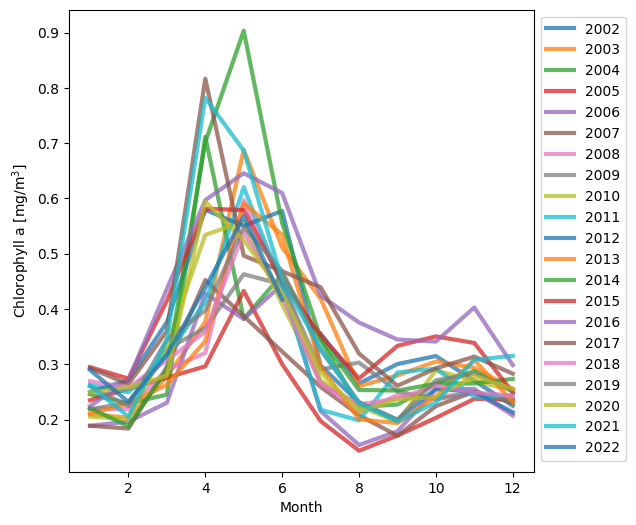

In [46]:
plt.figure(figsize=(6,6))
plt.plot(pv, alpha=0.75, linewidth=3)
plt.legend(pv.keys(), fontsize=10, bbox_to_anchor=(1, 1))
plt.xlabel('Month')
plt.ylabel('Chlorophyll a [mg/m$^3$]');

## Chlorophyll distribution with depth: light attenuation vs lack of nutrients

Recall that photosynthesis requires light and nutrients for primary production to occur. At the same time, the light is most available at the surface and it decays exponentially with depth. However, during the Chemical Oceanography tutorial we figured out that there is a lack of nutrients at the surface of the ocean. So where in the water column does photosynesis predominantly occur?

<img src="https://github.com/gmanuch/DataScienceOceanography/blob/main/Tutorials2025/BO/Attenuation-of-light-underwater.png?raw=1" width=350/>

### Deep Chlorophyll Maximum (DCM)
The deep chlorophyll maximum (DCM), also called the subsurface chlorophyll maximum, is the region below the surface of water with the maximum concentration of chlorophyll. The DCM generally exists at the same depth as the nutricline, the region of the ocean where the greatest change in the nutrient concentration occurs with depth.  https://en.wikipedia.org/wiki/Deep_chlorophyll_maximum

 Let's use the __Hawaii Ocean Time Series (HOT)__ dataset: https://simonscmap.com/catalog/datasets/HOT_PP

In [47]:
# read in the HOT dataset (1998-2019)
## https://simonscmap.com/catalog/datasets/HOT_PP
HOT = api.get_dataset('tblHOT_PP')
print(f'HOT columns only: {HOT.columns.values.tolist()}\n')

/usr/local/lib/python3.11/dist-packages/pycmap/rest.py:334: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(df['JSON_stats'][0])
/usr/local/lib/python3.11/dist-packages/pycmap/rest.py:335: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  rows = int(df.loc[['count'], 'lat'])


HOT columns only: ['time', 'lat', 'lon', 'depth', 'cruise_name', 'chl_hot', 'phaeopigments_hot', 'itype', 'light_12_hot', 'dark_12_hot', 'salinity_hot', 'prochlorococcus_hot', 'heterotrophic_bacteria_hot', 'synechococcus_hot', 'eukaryotes_hot']



In [48]:
#The HOT data comes at different depths, so let's make those into categories
HOT['depth_cat'] = HOT['depth']//20*20;  #using the floor division operator // to create depth bins separated by 20m.
HOT[HOT['depth_cat']==80]=np.nan;        #excluding categories where there is a small number of observations

In [49]:
#check existing depth categories
depth_bins=np.sort(HOT['depth_cat'].unique())
depth_bins=depth_bins[~np.isnan(depth_bins)].astype(int)
n=len(depth_bins)
print(depth_bins)

[  0  20  40  60 100 120 140 160]


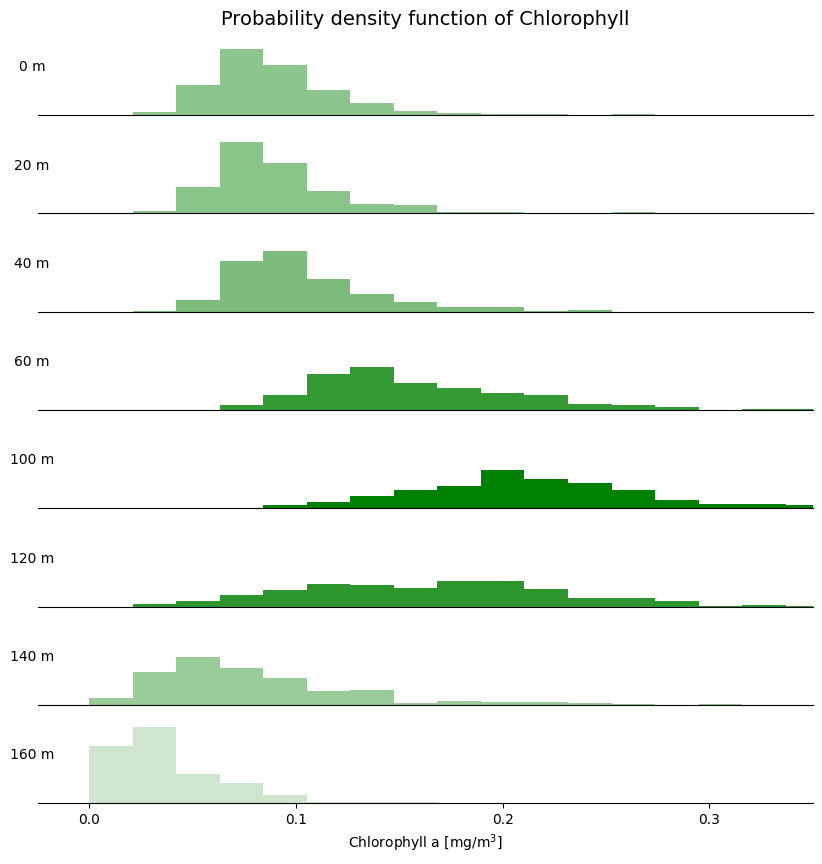

In [50]:
#visualize chlorophyll distributions at different depths; at what depth do you see the chl maximum?
fig, axs=plt.subplots(n,1, figsize=(10,10))

axs=axs.flatten()

for i in range(n):
    data=HOT[HOT['depth_cat'] == depth_bins[i]]['chl_hot']
    axs[i].hist(data,bins=np.linspace(0, 0.4,20), density=True,
                histtype='bar', ec='black',color='Green',alpha=np.min((np.mean(data)/0.2,1)))
    axs[i].set_yticks([])
    axs[i].set_xlim((-0.025,0.35))
    axs[i].set_ylim((0,20))

    axs[i].set_xticks([])
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].set_ylabel(str(depth_bins[i]) + ' m', rotation='horizontal')

axs[-1].set_xticks(np.linspace(0,0.3,4))
axs[-1].set_xlabel('Chlorophyll a [mg/m$^3$]')
axs[0].set_title('Probability density function of Chlorophyll', fontsize=14);

plt.savefig('chl_depth.pdf')
plt.show()

## Latitudinal distribution of Chlorophyll-a in the Atlantic Ocean

We will use the Atlantic Meridional Transect cruise 13: AMT13 Prochlorococcus and Synechococcus Abundance. https://simonscmap.com/catalog/datasets/AMT13_Prochlorococcus_Abundance

In [51]:
#Make a nice interactive plot using plotly.express and data from an ocean AMT cruise.

amt = api.get_dataset('tblAMT13_Chisholm')

px.scatter_geo(amt, lat='lat',lon='lon', title='AMT cruise')

/usr/local/lib/python3.11/dist-packages/pycmap/rest.py:334: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(df['JSON_stats'][0])
/usr/local/lib/python3.11/dist-packages/pycmap/rest.py:335: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  rows = int(df.loc[['count'], 'lat'])


## Gridding irregularly-spaced data

In [52]:
# data coordinates and values; note that depths and latitudes of data points are irregular
x = amt['lat']
y = amt['depth']
z = amt['chlA_AMT13']

# specify the desired grid to interpolate data
numcols, numrows = 40, 20
xi = np.linspace(x.min(), x.max(), numcols)
yi = np.linspace(y.min(), y.max(), numrows)
xi, yi = np.meshgrid(xi, yi)

zi = griddata((x,y),z,(xi,yi),method='linear')  # interpolate data onto the specified grid

NameError: name 'CS' is not defined

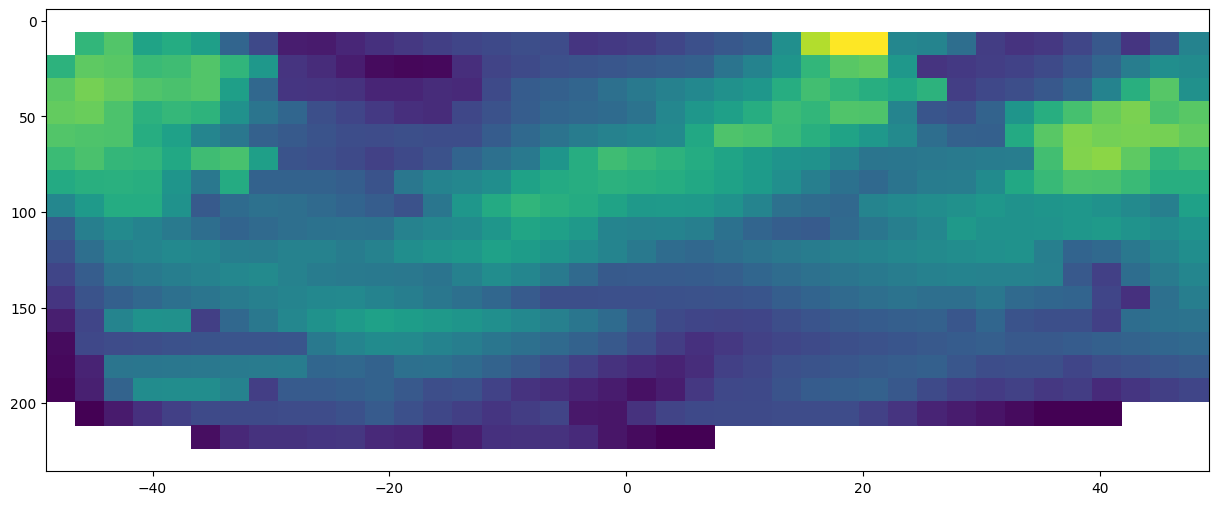

In [53]:
fig = plt.figure(figsize=(15,6)) #Make a nice figure!

plt.pcolor(xi,yi, zi,norm=LogNorm(vmin=0.01, vmax=1))
plt.gca().invert_yaxis() #Flip y axis

cbar = plt.colorbar(CS, label='Chlorophyll a'); # add color bar

plt.plot(x,y,'w.') # plot where original data points are with white dots

plt.xlabel('Latitude',fontsize=16) # make axis labels
plt.ylabel('Depth',   fontsize=16)

plt.plot(x, amt['DCM_AMT13'], 'r.-', label='DCM') # plot the depth of the maximum in chl (DCM variable)

plt.legend(); #add a legend

# What micro-organisms are there in the ocean?

<img src="https://github.com/gmanuch/DataScienceOceanography/blob/main/Tutorials2025/BO/organisms.png?raw=1" width=800/>

Armbrust, E. V., & Palumbi, S. R. (2015). Uncovering hidden worlds of ocean biodiversity. Science, 348(6237), 865-867. https://doi.org/10.1126/science.aaa7378

### Seaflow dataset: Prochlorococcus, Synechococcus, Picoeukaryote


__Prochlorococcus__ is a genus of very small (0.6 μm) marine cyanobacteria with an unusual pigmentation (chlorophyll a2 and b2). These bacteria belong to the photosynthetic picoplankton and are probably the most abundant photosynthetic organism on Earth. Prochlorococcus microbes are among the major primary producers in the ocean, responsible for a large percentage of the photosynthetic production of oxygen https://en.wikipedia.org/wiki/Prochlorococcus


__Synechococcus__ is a unicellular cyanobacterium that is very widespread in the marine environment. Its size varies from 0.8 to 1.5 µm. The photosynthetic coccoid cells are preferentially found in well–lit surface waters where it can be very abundant (generally 1,000 to 200,000 cells per ml). Many freshwater species of Synechococcus have also been described. https://en.wikipedia.org/wiki/Synechococcus


__Picoeukaryote__: In recent years it has become apparent that a vast unexplored diversity of algal forms exist in oceans as prokaryote-sized cells (0.2–3 μm of cell mean diameter) as part of the eukaryotic picoplankton (picoeukaryotes). Marine picoeukaryotes are found in all of the major algal groups (e.g., green algae, haptophytes, stramenopiles, and dinoflagellates) and have often been uncovered using environmental (meta)genomics or environmental polymerase chain reaction (PCR) approaches in which DNA sequences are determined from environmental samples without culturing particular isolates. https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/picoeukaryote



In [ ]:
# read in seaflow dataset (surface level- 5m- continuous samples across 50 cruises)
seaflow = api.get_dataset('tblSeaFlow_v1_5')


seaflow.keys()
# can also get with ancilliary data
#seaflow_all = api.get_dataset_with_ancillary("tblSeaFlow")
#print(f'seaflow with ancilliary: {seaflow_all.columns.values.tolist()}')

In [ ]:
seaflow.cruise.unique()

In [ ]:
##Example plot of prochlorococcus biomass distribution for seaflow
#fig = px.scatter_geo(seaflow, lat='lat',lon='lon',color='abundance_prochloro')
#fig.show()

ind=(seaflow['cruise']=='MGL1704')

plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)); #this specifies which projection to use
ax.set_global();
ax.add_feature(cfeature.COASTLINE);
ax.add_feature(cfeature.LAND);
ax.add_feature(cfeature.BORDERS);
#ax.scatter(seaflow['lon'],seaflow['lat'],5,transform=ccrs.PlateCarree());
im=ax.scatter(seaflow[ind]['lon'],seaflow[ind]['lat'],100,c=seaflow[ind]['abundance_prochloro'],transform=ccrs.PlateCarree());
plt.title('Prochlorococcus abundance for the MGL1704 cruise')
plt.colorbar(im);

In [ ]:
seaflow['lat_bins']=(seaflow['lat']).astype(int) # 1degree latitude bins

In [ ]:
seaflow_latbins=seaflow[ind].groupby(['lat_bins']).mean('lat_bins')
seaflow_latbins

### In-class exercise \#2: how do  prochloro, synecho, picoeuk abundances and biomasses vary with latitude?

In [ ]:
#type your solution here

### Continuously sampling instruments: Imaging FlowCytoBot (IFCB), size range from <4 to 100 μm



The Imaging FlowCytoBot (IFCB) is an in situ automated imaging flow cytometer that generates images of particles suspended in seawater, in this case from the underway uncontaminated seawater system aboard the R/V Langseth (intake 5m). The IFCB uses a recycled sheath fluid (0.2 µm filtered seawater) to align and drive particles individually towards a light source (red laser, 4.5 mW) in order to detect and identify single or colonial cells using a combination of optical properties (red fluorescence and light scattering intensities) and high resolution images (3.2 pixels per micron) by a mounted camera. Both optical properties are used to trigger targeted image acquisition of suspended particles in the size range <4 to 100 µm. The instrument continuously samples (few seconds) from ~5 ml aliquots from the intake, and processes all particles contained in that volume for the next 20 mins. This dataset is for the abundance of imaged cells by genus: https://simonscmap.com/catalog/datasets/Gradients2_MGL1704_IFCB_Abundance

In [ ]:
ifcb_g2 = api.get_dataset('tblMGL1704_Gradients2_IFCB_Abundance')
ifcb_g2['time'] = pd.DatetimeIndex(ifcb_g2['time'])

In [ ]:
mean_cells=ifcb_g2[ifcb_g2['lat']<30].mean()[3:-3].dropna().sort_values(ascending=False)

plt.figure(figsize=(20,5))
plt.bar(mean_cells[:40].keys(),(mean_cells[:40]))
plt.xticks(rotation='vertical', fontsize=14)
plt.yscale('log')
plt.ylim((100,12000))
plt.ylabel('Cells per L')
plt.title('Cell ubandance by genus', fontsize=14);

#### Most abundant for lats<30 is __Lepidodinium__, which is a genus of __Dinoflagellates__ belonging to the family __Gymnodiniaceae__.

### In-class exercise #3: what are most abundant cells by genus for lats>40?

In [ ]:
#type your solution here

## IFCB species can be further categorized into higher level groups using the Pyworms package

<img src="https://github.com/gmanuch/DataScienceOceanography/blob/main/Tutorials2025/BO/tree.png?raw=1" width=650/>




### What are Diatoms, Dinoflagellates, and Haptophytes?
These are common types of phytoplankton that are studied by biologicla oceanographers. They are also primary producers (photosynthesizers) that are the base of food webs for marine ecosystems. These groups are distinguished by their distinct phylogenetic groups and are typically much bigger the cyanobacteria, Prochlorococcus and Synechococcus, measured by the SeaFlow.


<img src="https://github.com/gmanuch/DataScienceOceanography/blob/main/Tutorials2025/BO/Diatoms_through_the_microscope.jpeg?raw=1" width=300/>  <img src="https://github.com/gmanuch/DataScienceOceanography/blob/main/Tutorials2025/BO/Ceratium_hirundinella.jpeg?raw=1" width=150/> <img src="https://github.com/gmanuch/DataScienceOceanography/blob/main/Tutorials2025/BO/Coccolithus_pelagicus.jpeg?raw=1" width=200/>


__Diatoms__ are a a type of protists that are typically known to make "houses of glasses" with silica frustules. They can grow as single cells or in colonies, ranging from 10-200µm. Under a microscope, you can see their unique structures and coloration from their photosynthetic pigments. They are known to be a lare source of oxygen produced per year, wtih an estimated 20-50% of total global production. Furthermore, their beautiful structures have inspired artists to make diatom art as well. https://en.wikipedia.org/wiki/Diatom


__Dinoflagellates__ are a group of unicellular eukaryotes that can photosynthesize but also eat other phytoplankton. Some also rely on endosymbiosis with other marine organisms, such as corals, or parasitism. Dinoflagellates are commonly characterized by having 2 flagella for motility. This type of phytoplankton are usually smaller than diatoms, though they can range from 5-200 µm as well. Harmful algal blooms (HABs) also typically consist of dinoflagellate species that release toxins into the water, causing respiratory and even lethal effects in other marine organisms or humans. https://en.wikipedia.org/wiki/Dinoflagellate

__Haptophytes__: are another group of unicellular, eukaryotic photosynthesizers. Like dinoflagellates, some species have flagellates while others are nonmotile cells with walls. A common example are the __coccolithophores__, which are cells that form calcareous plates to armor themselves. Other species can also form toxic HABs, which can produce smelly foam on beaches. Haptophytes are on the smaller end, usually ranging between 2-40 µm. https://en.wikipedia.org/wiki/Haptophyte





